<a href="https://colab.research.google.com/github/danil31219as/geekz/blob/main/geekz_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
users_df = pd.read_csv('users.csv', encoding='utf-16')

In [7]:
users_df.head()

,user_id,lessonTest1_score,lessonWebinar2_visit,lesson3_visit,lesson3_progress,lesson4_visit,lesson4_progress,lesson5_visit,lesson5_progress,lesson6_visit,lesson6_progress,lesson7_visit,lesson7_progress,lessonTest8_score,lessonWebinar9_visit,lesson10_visit,lesson10_progress,lesson11_visit,lesson11_progress,lesson12_visit,lesson12_progress,lessonWebinar13_visit,lessonTest14_score
0,1,62,0,1,47,0,41,1,34,1,36,1,53,60,1,0,44,0,39,0,45,1,57
1,2,85,0,1,76,0,93,1,85,0,70,1,80,76,1,1,85,1,84,0,75,1,72
2,3,3,0,0,12,0,27,1,28,0,15,0,27,10,1,0,5,1,9,1,12,1,25
3,4,67,1,0,69,1,50,1,59,1,45,0,38,42,1,0,35,1,69,0,35,0,46
4,5,88,1,1,79,0,93,0,80,1,97,0,92,72,1,1,87,0,75,1,87,1,84


In [8]:
mean_df = pd.DataFrame({'user_id': users_df['user_id']})

In [9]:
mean_df['score'] = np.zeros(len(users_df))
mean_df['visit'] = np.zeros(len(users_df))
mean_df['progress'] = np.zeros(len(users_df))

In [10]:
count_score = 0
count_visit = 0
count_progress = 0
for column in users_df.columns:
  if 'score' in column:
    mean_df['score'] += users_df[column]
    count_score += 1
  elif 'visit' in column:
    mean_df['visit'] += users_df[column]
    count_visit += 1
  elif 'progress' in column:
    mean_df['progress'] += users_df[column]
    count_progress += 1

In [11]:
mean_df['score'] /= count_score * 100
mean_df['visit'] /= count_visit
mean_df['progress'] /= count_progress * 100

In [74]:
mean_df.pop('user_id')

0        1
1        2
2        3
3        4
4        5
      ... 
295    296
296    297
297    298
298    299
299    300
Name: user_id, Length: 300, dtype: int64

In [75]:
mean_df.head()

,score,visit,progress
0,0.596667,0.545455,0.42375
1,0.776667,0.636364,0.81000
2,0.126667,0.454545,0.16875
3,0.516667,0.545455,0.50000
4,0.813333,0.636364,0.86250


In [76]:
from sklearn.cluster import KMeans
hc = KMeans(3)
y_hc = hc.fit_predict(mean_df)

In [77]:
mean_df['user_id'] = users_df['user_id']

In [78]:
mean_df.head()

,score,visit,progress,user_id
0,0.596667,0.545455,0.42375,1
1,0.776667,0.636364,0.81000,2
2,0.126667,0.454545,0.16875,3
3,0.516667,0.545455,0.50000,4
4,0.813333,0.636364,0.86250,5


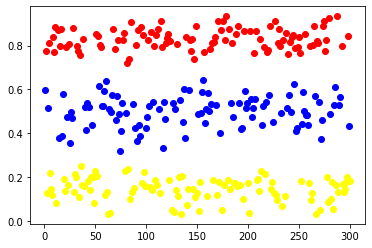

In [79]:
plt.scatter(mean_df.iloc[y_hc ==0,3],mean_df.iloc[y_hc ==0,0],  c='red')
plt.scatter(mean_df.iloc[y_hc ==1,3],mean_df.iloc[y_hc ==1,0],  c='blue')
plt.scatter(mean_df.iloc[y_hc ==2,3],mean_df.iloc[y_hc ==2,0],  c='yellow')

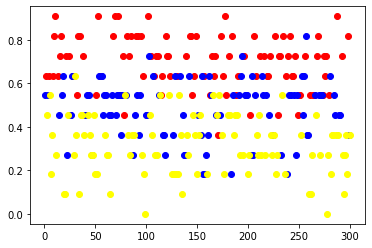

In [80]:
plt.scatter(mean_df.iloc[y_hc ==0,3],mean_df.iloc[y_hc ==0,1],  c='red')
plt.scatter(mean_df.iloc[y_hc ==1,3],mean_df.iloc[y_hc ==1,1],  c='blue')
plt.scatter(mean_df.iloc[y_hc ==2,3],mean_df.iloc[y_hc ==2,1],  c='yellow')

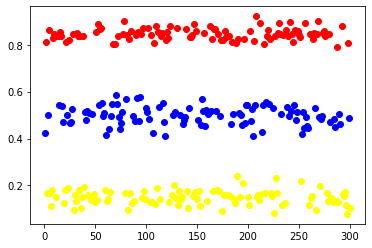

In [81]:
plt.scatter(mean_df.iloc[y_hc ==0,3],mean_df.iloc[y_hc ==0,2],  c='red')
plt.scatter(mean_df.iloc[y_hc ==1,3],mean_df.iloc[y_hc ==1,2],  c='blue')
plt.scatter(mean_df.iloc[y_hc ==2,3],mean_df.iloc[y_hc ==2,2],  c='yellow')

In [42]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(hc,f)

with open('model.pkl', 'rb') as f:
    hc = pickle.load(f)

In [91]:
df1 = users_df.iloc[y_hc == 0]
df2 = users_df.iloc[y_hc == 1]
df3 = users_df.iloc[y_hc == 2]

In [94]:
for i in range(3):
  df1.iloc[i * 25:i * 25 + 25].to_csv(f'course_{i + 1}_top.csv', index=False)

In [95]:
for i in range(3):
  df2.iloc[i * 25:i * 25 + 25].to_csv(f'course_{i + 1}_middle.csv', index=False)

In [96]:
for i in range(3):
  df3.iloc[i * 25:i * 25 + 25].to_csv(f'course_{i + 1}_low.csv', index=False)

In [97]:
df4 = df1.iloc[75:100].append(df2.iloc[75:100]).append(df3.iloc[75:100])

In [101]:
df4 = df4.sample(frac=1)

In [102]:
for i in range(3):
  df4.iloc[i * 25:i * 25 + 25].to_csv(f'course_{i + 1}_mix.csv', index=False)